In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn import metrics
import datetime as dt
import matplotlib.dates as mdates

In [2]:
data=pd.read_csv('../data/NFLX.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,05-02-2018,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,06-02-2018,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,07-02-2018,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,08-02-2018,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,09-02-2018,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


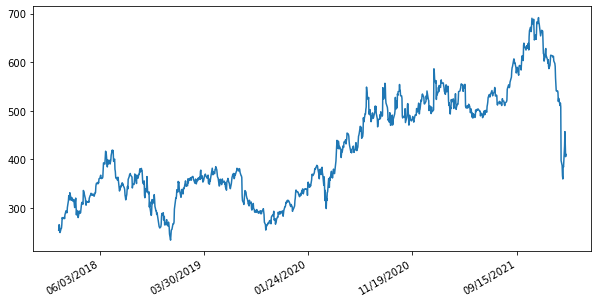

In [3]:
plt.figure(figsize=(10, 5))
x = [dt.datetime.strptime(d,'%d-%m-%Y').date() for d in data['Date']]
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=300))
plt.plot(x,data['Close'])
plt.gcf().autofmt_xdate()


In [4]:
data= data.dropna()
x = data[['High', 'Low', 'Open', 'Volume']].values
y = data['Close'].values

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [7]:
regressor.fit(x_train, y_train)

LinearRegression()

In [8]:
predicted = regressor.predict(x_test)
print(regressor.score(x_test,y_test))

0.998771446978917


In [9]:
data2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted' : predicted.flatten()})
data2.head()

,Actual,Predicted
0,591.150024,585.614105
1,634.809998,634.664837
2,365.489990,366.232940
3,433.829987,431.907066
4,419.730011,415.389340


In [10]:
import math
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,predicted))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,predicted))
print('Root Mean Squared Error:', math.sqrt(metrics.mean_squared_error(y_test,predicted)))


Mean Absolute Error: 2.7195226168315867
Mean Squared Error: 16.199118398733326
Root Mean Squared Error: 4.0248128402117445


<AxesSubplot:>

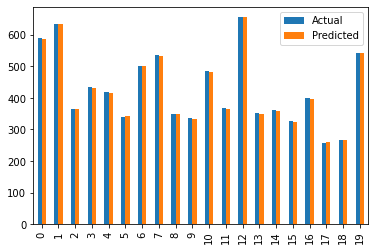

In [11]:
graph = data2.head(20)
graph.plot(kind='bar')